In [1]:
from Industrial_robot import IndustrialRobot
import numpy as np

In [2]:
robot ={0:'xy,z,0.22',
        1:'xz,z,0.18',
        2:'xz,z,0.36',
        3:'yz,x,0.2',
        4:'xz,x,0.165',
        5:'yz,x,0.08',
        6:'ee,x,0.0001'}
test = IndustrialRobot(robot)

In [3]:
test.max_length

1.2051

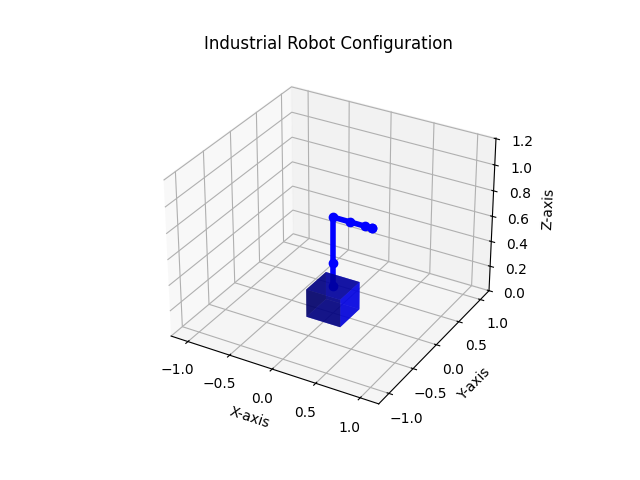

In [4]:
%matplotlib widget
test.plot_robot()

In [5]:
import pandas as pd
import numpy as np
obj = pd.read_csv('/home/thijssnel/programeren/jaar_4/ip/test_meting_robot.csv')
obj['Distance'] = obj['Distance']/1000

obj_list =[(i[1]['Distance'],-i[1]['H_Angle'],i[1]['V_Angle']) for i in obj.iterrows()]

In [6]:
test.update_objects(objects=obj_list,correction=[-0.1,-0.25,0], direction='x')

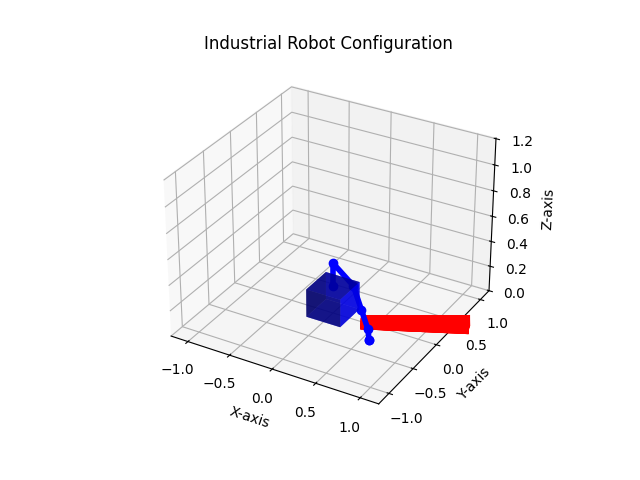

In [7]:
value = [-0.42786505998203384, 1.7451330134956284, -0.9493224010472553, -0.008433662209142791, 0.5158762442704572, -0.9145525280450286]
for i,val in enumerate(value):
    setattr(test, f'q{i+1}_val',val)
%matplotlib widget
test.plot_robot()

In [8]:
test.q7_car

array([ 5.73487993e-01, -2.61899463e-01, -6.36257321e-04,  1.31163895e+00,
       -4.44099883e-01, -9.37581455e-01])

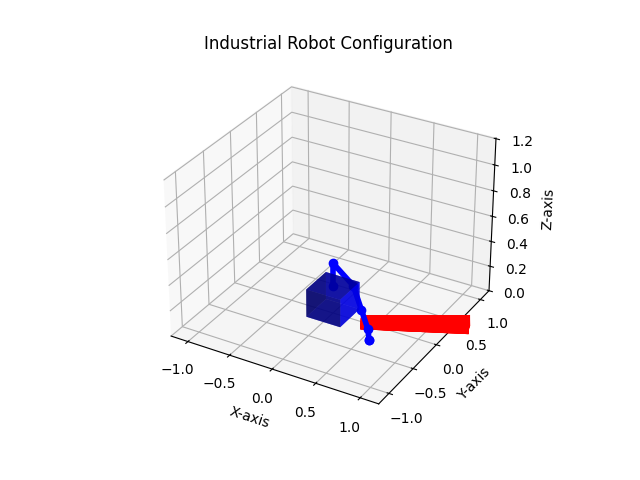

In [9]:
%matplotlib widget
test.plot_robot()

In [10]:
x =  [0,1,2]
x[-2]

1

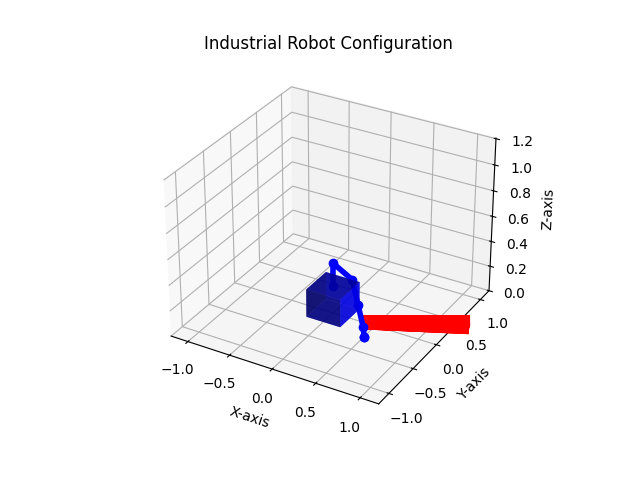

-0.22828698319574015 1.3249976767916445 -0.49933854621365986 0.0675552632652958 0.2720705146925436 -0.9465754484674198
[ 0.03335839 -0.40222987  0.14793944]


In [ ]:
value = [-0.47990, 1.59404, -0.62694, 0.04842, 0.34806, -1.04618]
for i,val in enumerate(value):
    setattr(test, f'q{i+1}_val',val)
test.plot_robot()

full_path = {}
i = 0

# ---- FIRST DESTINATION ----
test.path = {}   # <--- IMPORTANT: clear before generating a new path
test.get_to_destination(destination=[0.583, 0.260, 0.015, 0., 0., 0.], dt=1/10,attractive_coff=1)
for _, path in test.path.items():
    full_path[i] = path
    i += 1

print(test.q1_val, test.q2_val, test.q3_val, test.q4_val, test.q5_val, test.q6_val)
print(test.q7_car[:3]-[0.583, 0.260, 0,])

In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

path = full_path
filename = "industrial_robot_animation.gif"
frames = len(path)

fig = plt.figure(figsize=(12,4))

# ---------------------------------------------------------
# AXIS 1 — Original view
# ---------------------------------------------------------
ax1 = fig.add_subplot(131, projection='3d')
ln1, = ax1.plot([], [], [], '-o', color='blue', linewidth=4, markersize=6)

ax1.set_title("Original View")
ax1.set_xlabel('X-axis'); ax1.set_ylabel('Y-axis'); ax1.set_zlabel('Z-axis')
ax1.grid(True)
max_range = 6
ax1.set_xlim(-test.max_length, test.max_length)
ax1.set_ylim(-test.max_length, test.max_length)
ax1.set_zlim(0, test.max_length/2)
ax1.set_proj_type('ortho')

# for p1, p2 in test.detected_objects:
#     ax1.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='red', linewidth=4)


# ---------------------------------------------------------
# AXIS 2 — YZ plane (camera along +X)
# ---------------------------------------------------------
ax2 = fig.add_subplot(132, projection='3d')
ln2, = ax2.plot([], [], [], '-o', color='blue', linewidth=4, markersize=6)

ax2.set_title("YZ View (Looking along +X)")
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.grid(True)
ax2.set_xlim(-test.max_length, test.max_length)
ax2.set_ylim(+test.max_length, -test.max_length)
ax2.set_zlim(0, test.max_length/2)

# rotate view: look along +X axis
ax2.view_init(elev=0, azim=90)

# for p1, p2 in test.detected_objects:
#     ax2.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='red', linewidth=4)


# ---------------------------------------------------------
# AXIS 3 — XZ plane (camera along +Y)
# ---------------------------------------------------------
ax3 = fig.add_subplot(133, projection='3d')
ln3, = ax3.plot([], [], [], '-o', color='blue', linewidth=4, markersize=6)

ax3.set_title("XZ View (Looking along +Y)")
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
ax3.grid(True)
ax3.set_xlim(-test.max_length, test.max_length)
ax3.set_ylim(+test.max_length, -test.max_length)
ax3.set_zlim(0, test.max_length/2)

# rotate view: look along +Y axis
ax3.view_init(elev=0, azim=0)

# for p1, p2 in test.detected_objects:
#     ax3.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='red', linewidth=4)


# ---------------------------------------------------------
# UPDATE FUNCTION — update all 3 views
# ---------------------------------------------------------
def update(i):
    x=[path[i][x][0] for x in range(len(path[i]))]
    y=[path[i][y][1] for y in range(len(path[i]))]
    z=[path[i][z][2] for z in range(len(path[i]))]

    # original view
    ln1.set_data(x, y)
    ln1.set_3d_properties(z)

    # yz view
    ln2.set_data(x, y)
    ln2.set_3d_properties(z)

    # xz view
    ln3.set_data(x, y)
    ln3.set_3d_properties(z)

    return ln1, ln2, ln3


ani = FuncAnimation(fig, update, frames=frames, interval=1000/10)
writer = PillowWriter(fps=10)
ani.save(filename, writer=writer)
plt.close(fig)


In [13]:
import numpy as np 
arr = np.array([[ 0.96488889, 0.73641667, 0.67521429, 0.592875, 0.53172222],[ 0.78008333, 0.5938125, 0.481, 0.39883333, 0.]])
print(arr[np.where(arr != 0.)])

[0.96488889 0.73641667 0.67521429 0.592875   0.53172222 0.78008333
 0.5938125  0.481      0.39883333]


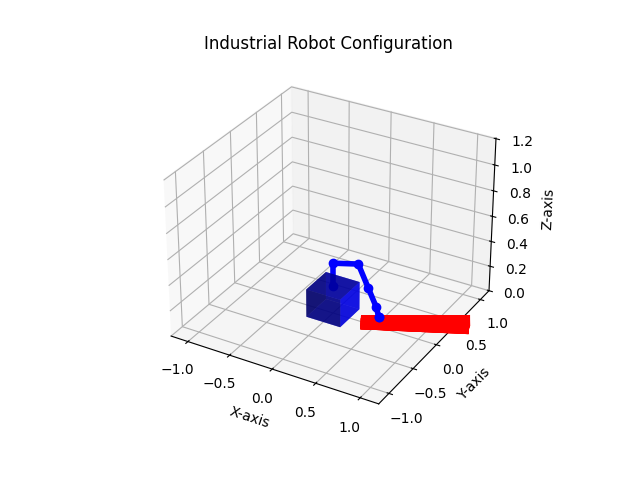

In [14]:
test.plot_robot()

In [15]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation, PillowWriter
# path = full_path
# filename = "industrial_robot_animation.gif"

# frames = len(path)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ln, = ax.plot([],[],[], '-o', color='blue', linewidth=4, markersize=6)
# # shadow_x, = ax.plot([],[],[],'-o', color='gray', linewidth=4, alpha=0.5, markersize=6)
# # shadow_y, = ax.plot([],[],[],'-o', color='gray', linewidth=4, alpha=0.5, markersize=6)
# # shadow_z, = ax.plot([],[],[],'-o', color='gray', linewidth=4, alpha=0.5, markersize=6)

# ax.set_title("Industrial Robot Configuration")
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# ax.grid(True)

#         # Make aspect ratio equal
# max_range = 6
# ax.set_xlim(- max_range/2, max_range/2)
# ax.set_ylim(+ max_range/2, -max_range/2)
# ax.set_zlim(0, max_range/2)
# for p1,p2 in test.detected_objects:
#     ax.plot3D([p1[0],p2[0]], [p1[1],p2[1]],[p1[2],p2[2]])



# def update(i):
#     x=[path[i][x][0] for x in range(len(path[i]))]
#     y=[path[i][y][1] for y in range(len(path[i]))]
#     z=[path[i][z][2] for z in range(len(path[i]))]
#     ln.set_data(x, y)
#     ln.set_3d_properties(z)
#     # shadow_x.set_data([ max_range/2]*len(x), y)
#     # shadow_x.set_3d_properties(z)
#     # shadow_y.set_data(x, [-max_range/2]*len(y))
#     # shadow_y.set_3d_properties(z)
#     # shadow_z.set_data(y, x)
#     # shadow_z.set_3d_properties([0]*len(z))
#     return ln
        
# ani = FuncAnimation(fig, update, frames=frames, interval=1000/30)
# writer = PillowWriter(fps=int(30*30))
# ani.save(filename, writer=writer)
# plt.close(fig)


In [16]:
x = [2,3,4]
y=[5,6,7]
[x0+y0 for x0 in x for y0 in y]

[7, 8, 9, 8, 9, 10, 9, 10, 11]

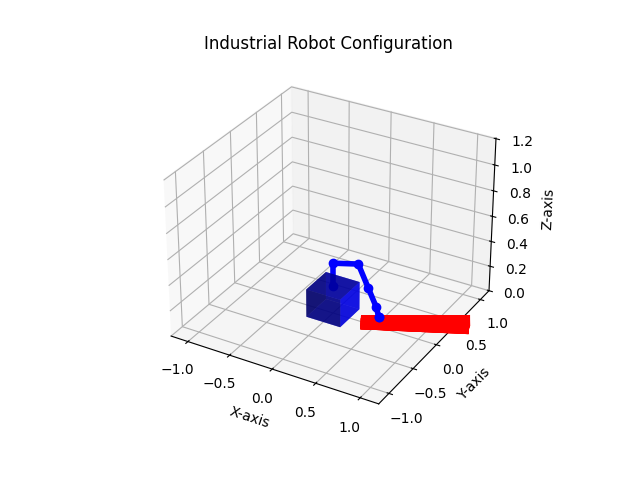

In [17]:
test.plot_robot()

In [18]:
# best_score = 1e18
# best_params = None

# attractives = [0.5 +0.1*i for i in range(10)]
# repellent_gains = [5*10**(-(5-i)) for i in range(10)]
# repellent_ranges = [0.5 +0.1*i for i in range(10)]
# lams = [1*10**(-i) for i in range(5,15)]

# for a in attractives:
#     for rg in repellent_gains:
#         for rr in repellent_ranges:
#             for lam in lams:
#                 tot_score = 0
#                 for i in [(2,0,0),(0,2,0),(0,0,2),(2,2,2),(-2,-2,2)]:
#                     score, details = test.get_to_destination(destination= i, dt= 1/30, attractive_coff=a,
#                             repelent_joint=rg, range_repelent=rr,lam=lam, time=10, verbose = True, reset = False
#                     )
#                     tot_score += score
#                     print(a, rg, rr, lam, score)
#                 if tot_score < best_score:
#                     best_score = tot_score
#                     best_params = (a, rg, rr, lam)

# print("BEST SCORE:", best_score)
# print("BEST PARAMS:", best_params)


In [19]:
rep = [[0,  0,  1,  0,  0,  0 ],
 [0,  0,  3,  0,  0,  0 ],
 [0,  2,  3,  0,  0,  0 ],
 [0,  3,  3,  0,  0,  0 ],
 [0,  3.5, 3,  0,  0,  0, ]]

In [20]:
[i[:3] for i in rep ]

[[0, 0, 1], [0, 0, 3], [0, 2, 3], [0, 3, 3], [0, 3.5, 3]]

In [21]:
import numpy as np
np.linalg.pinv(np.array(test.jacobian_b7.evalf(subs=test.get_joint_dict()),dtype=float))

array([[ 3.79283300e-01,  1.63246942e+00, -4.03635524e-15,
        -1.66069410e-01,  2.26556822e-01, -8.19947968e-02],
       [ 2.08983807e+00, -4.85547031e-01, -2.32561070e+00,
        -3.61562331e-02,  1.68091144e-01,  6.96335215e-02],
       [-5.03827870e+00,  1.17057934e+00,  1.56622946e+00,
         1.84071685e-01, -7.95419162e-01, -3.10061413e-01],
       [-1.35436479e+00, -2.59300769e+00, -1.83739418e-01,
         5.05917393e+00, -7.42773052e+00,  2.11055148e+00],
       [ 2.92435451e+00, -7.58192034e-01,  7.57649103e-01,
        -6.70846023e-01,  3.08355076e+00,  1.26603734e+00],
       [ 1.69550249e+00,  3.93770675e+00,  1.90756083e-01,
        -3.32172638e+00,  6.37493334e+00, -3.06121713e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [22]:
test.path

{0: {0: array([ 0.    ,  0.    ,  0.22  , -0.    , -0.4799,  0.    ]),
  1: array([0.        , 0.        , 0.4       , 1.54755265, 2.66169265,
         3.14159265]),
  2: array([ 0.31924854, -0.16616367,  0.39163303,  0.9671    , -0.4799    ,
          0.        ]),
  3: array([ 0.41996129, -0.21858302,  0.22698446,  0.9671    , -0.4799    ,
          0.04842   ]),
  4: array([ 0.50304931, -0.26182899,  0.09114938,  1.31426408, -0.41479063,
          0.10850512]),
  5: array([ 0.52162626, -0.27000914,  0.01376733,  1.31426408, -0.41479063,
         -0.93767488]),
  6: array([ 0.52164948, -0.27001936,  0.0136706 ,  1.31426408, -0.41479063,
         -0.93767488])},
 1: {0: array([ 0.        ,  0.        ,  0.22      , -0.        , -0.47422851,
          0.        ]),
  1: array([ 0.        ,  0.        ,  0.4       ,  1.18245327, -0.47422851,
          0.        ]),
  2: array([ 0.2964241 , -0.1521536 ,  0.53631593,  0.88042018, -0.47422851,
          0.        ]),
  3: array([ 0.4097341

In [23]:
test.path

{0: {0: array([ 0.    ,  0.    ,  0.22  , -0.    , -0.4799,  0.    ]),
  1: array([0.        , 0.        , 0.4       , 1.54755265, 2.66169265,
         3.14159265]),
  2: array([ 0.31924854, -0.16616367,  0.39163303,  0.9671    , -0.4799    ,
          0.        ]),
  3: array([ 0.41996129, -0.21858302,  0.22698446,  0.9671    , -0.4799    ,
          0.04842   ]),
  4: array([ 0.50304931, -0.26182899,  0.09114938,  1.31426408, -0.41479063,
          0.10850512]),
  5: array([ 0.52162626, -0.27000914,  0.01376733,  1.31426408, -0.41479063,
         -0.93767488]),
  6: array([ 0.52164948, -0.27001936,  0.0136706 ,  1.31426408, -0.41479063,
         -0.93767488])},
 1: {0: array([ 0.        ,  0.        ,  0.22      , -0.        , -0.47422851,
          0.        ]),
  1: array([ 0.        ,  0.        ,  0.4       ,  1.18245327, -0.47422851,
          0.        ]),
  2: array([ 0.2964241 , -0.1521536 ,  0.53631593,  0.88042018, -0.47422851,
          0.        ]),
  3: array([ 0.4097341

In [24]:
import numpy as np

def score_trajectory(robot,
                     destination,
                     attractive=0.5,
                     repellent_gain=0.0001,
                     repellent_range=2.0,
                     lam=1e-4,
                     dt=0.01,
                     max_time=10.0,
                     verbose=False):
    """
    Runs a simulated trajectory with specific parameters and returns a score.
    Lower score = better.

    robot must have:
        - a method get_to_destination_score_mode(...)
        (or you can integrate this evaluator inside get_to_destination)
    """

    # Reset robot configuration if needed
    robot.reset_joints()   # implement yourself if needed

    steps = int(max_time / dt)
    destination = np.array(destination, dtype=float)

    arrival_time = max_time
    final_error = None
    collision_cost = 0.0
    smoothness_cost = 0.0

    prev_q = np.array(robot.get_joint_vector())

    for step in range(steps):

        # --- RUN ONE CONTROL STEP (your modified controller function) ---
        dq = robot.control_step(
            destination=destination,
            attractive=attractive,
            repellent_gain=repellent_gain,
            repellent_range=repellent_range,
            lam=lam,
            dt=dt
        )

        # Apply dq
        robot.apply_dq(dq, dt)

        # --- SMOOTHNESS COST: penalize big joint movements ---
        smoothness_cost += np.sum(dq**2) * dt

        # --- COLLISION COST ---
        # compute all joint positions
        robot.get_joint_position_car()
        qpos = robot.get_joint_cart_positions()  # must return list of 3D points

        # sum penalty if joints are closer than repellent_range
        for i in range(len(qpos)):
            for j in range(i+2, len(qpos)):  # skip adjacent joints
                d = np.linalg.norm(qpos[i] - qpos[j])
                if d < repellent_range:
                    collision_cost += (1.0 / max(d, 1e-6)) * dt

        # --- CHECK TARGET ARRIVAL ---
        ee_pos = robot.q7_car[:3]
        if np.linalg.norm(ee_pos - destination[:3]) < 1e-3:
            arrival_time = step * dt
            break

    # --- FINAL POSITION ERROR ---
    ee_pos = robot.q7_car[:3]
    final_error = np.linalg.norm(ee_pos - destination[:3])

    # --- TOTAL SCORE ---
    # weights are tunable
    score = (
        1.0 * arrival_time +
        50.0 * final_error +
        10.0 * collision_cost +
        0.1 * smoothness_cost
    )

    if verbose:
        print("arrival_time:", arrival_time)
        print("final_error:", final_error)
        print("collision_cost:", collision_cost)
        print("smoothness_cost:", smoothness_cost)
        print("TOTAL SCORE:", score)

    return score, {
        "arrival_time": arrival_time,
        "final_error": final_error,
        "collision_cost": collision_cost,
        "smoothness_cost": smoothness_cost
    }


In [ ]:
import os
import re
import imageio.v2 as imageio

os.chdir('/home/thijssnel/programeren/jaar_4/ip/gif_obstacleless')

def sort_key(filename):
    base = re.sub(r' \(\d+\)', '', filename)
    match = re.search(r'\((\d+)\)', filename)
    copy_number = int(match.group(1)) if match else 0
    return (base, copy_number)

images = []

for filename in sorted(os.listdir(), key=sort_key):
    if filename.lower().endswith('.jpeg'):
        print(filename)
        images.append(imageio.imread(filename))

# 10 frames per second → 0.1 seconds per frame
imageio.mimsave(
    '/home/thijssnel/programeren/jaar_4/ip/obstacleless.gif',
    images,
    duration=0.1
)

WhatsApp Image 2025-12-16 at 15.53.59.jpeg
WhatsApp Image 2025-12-16 at 15.53.59 (1).jpeg
WhatsApp Image 2025-12-16 at 15.54.00.jpeg
WhatsApp Image 2025-12-16 at 15.54.01.jpeg
WhatsApp Image 2025-12-16 at 15.54.01 (1).jpeg
WhatsApp Image 2025-12-16 at 15.54.08.jpeg
WhatsApp Image 2025-12-16 at 15.54.09.jpeg
WhatsApp Image 2025-12-16 at 15.54.09 (1).jpeg
WhatsApp Image 2025-12-16 at 15.54.09 (2).jpeg
WhatsApp Image 2025-12-16 at 15.54.09 (3).jpeg
WhatsApp Image 2025-12-16 at 15.54.10.jpeg
WhatsApp Image 2025-12-16 at 15.54.10 (1).jpeg
WhatsApp Image 2025-12-16 at 15.54.10 (2).jpeg
WhatsApp Image 2025-12-16 at 15.54.11.jpeg
WhatsApp Image 2025-12-16 at 15.54.11 (1).jpeg
WhatsApp Image 2025-12-16 at 15.54.11 (2).jpeg
WhatsApp Image 2025-12-16 at 15.54.12.jpeg
WhatsApp Image 2025-12-16 at 15.54.12 (1).jpeg
WhatsApp Image 2025-12-16 at 15.54.12 (2).jpeg
WhatsApp Image 2025-12-16 at 15.54.12 (3).jpeg
WhatsApp Image 2025-12-16 at 15.54.13.jpeg
WhatsApp Image 2025-12-16 at 15.54.13 (1).jpeg
Wh

In [ ]:
len(test.path_rad)

100

In [ ]:
test.path_rad[1]

[np.float64(-0.4742667572053057),
 np.float64(1.1805498340658636),
 np.float64(-0.30013681688436267),
 np.float64(0.047598420741443645),
 np.float64(0.7436521657049758),
 np.float64(-1.0451338200000002)]